# Setting up environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/MyDrive
%mkdir Technical_Test_Vucar
%cd Technical_Test_Vucar
%mkdir -p dataset
%mkdir -p models
%cd dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s' -O car.csv
%cd ..


Mounted at /content/drive/
/content/drive/MyDrive
mkdir: cannot create directory ‘Technical_Test_Vucar’: File exists
/content/drive/MyDrive/Technical_Test_Vucar
/content/drive/MyDrive/Technical_Test_Vucar/dataset
--2025-01-08 15:47:39--  https://docs.google.com/uc?export=download&id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s
Resolving docs.google.com (docs.google.com)... 142.251.188.101, 142.251.188.102, 142.251.188.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.188.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s&export=download [following]
--2025-01-08 15:47:39--  https://drive.usercontent.google.com/download?id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.1

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

# Data Preprocessing

## Load Dataset

In [3]:
file_path = 'dataset/car.csv'
data = pd.read_csv(file_path)
data

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
0,148468232,108616925,1693378633111,1980,Jeep,A2,Mỹ,SUV / Cross over,4.0,MT,petrol,green,40000,380000000.0,used
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
4,149530234,109517456,1693313503000,2001,Fiat,Siena,NaN,NaN,NaN,MT,petrol,white,200000,73000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317631,148874300,108958993,1696836032000,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,150398284,110264477,1695692918000,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317633,150748445,110565749,1696580444000,2004,Ssangyong,Musso,Hàn Quốc,SUV / Cross over,7.0,MT,petrol,white,20000,95000000.0,used
317634,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


## Eliminate Brands Not Representing 90% of Total Cars (Data Version)

In [4]:
brand_counts = data['brand'].value_counts()
total_brands = brand_counts.sum()

brand_counts_cumsum = brand_counts.cumsum()
brand_percent = brand_counts_cumsum / total_brands

brands_top_90 = brand_percent[brand_percent <= 0.9].index

filtered_data = data[data['brand'].isin(brands_top_90)]
filtered_data

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317630,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used
317631,148874300,108958993,1696836032000,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,150398284,110264477,1695692918000,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317634,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


## Dataset Overview and Initial Exploration

### Check for missing values

In [5]:
def check_missing_values(data):
  missing_values = data.isnull().sum()
  return missing_values[missing_values > 0]

In [6]:
missing_values_data = check_missing_values(data)
missing_values_data

,0
brand,50
model,50
origin,83319
type,44702
seats,33844
gearbox,1393
fuel,94
color,96096
price,112


In [7]:
missing_values_filtered_data = check_missing_values(filtered_data)
missing_values_filtered_data

,0
origin,75046
type,37753
seats,28359
gearbox,1371
fuel,44
color,86267
price,112


### Get unique values for better understanding

In [8]:
key_columns = ['brand', 'type', 'fuel', 'gearbox', 'condition']
{col: data[col].unique() for col in key_columns}

{'brand': array(['Jeep', 'Honda', 'Kia', 'Toyota', 'Fiat', 'Hyundai', 'Mitsubishi',
        'Mercedes Benz', 'Mazda', 'Chevrolet', 'Ford', 'Vinfast', 'Daewoo',
        'Nissan', 'BMW', 'Suzuki', 'Hãng khác', 'Isuzu', 'MG', 'Peugeot',
        'Lexus', 'Volkswagen', 'Ssangyong', 'Porsche', nan, 'Daihatsu',
        'Haval', 'Audi', 'Lifan', 'Jaguar', 'Renault', 'Chrysler',
        'Subaru', 'Bentley', 'LandRover', 'Lincoln', 'Volvo', 'Dodge',
        'Mini', 'Acura', 'Cadillac', 'Gaz', 'Zotye', 'SYM', 'Changan',
        'Luxgen', 'HongQi', 'Ferrari', 'Chery', 'Maybach', 'Infiniti',
        'Rolls Royce', 'Smart', 'Mekong', 'RAM', 'Maserati', 'Citroen',
        'Baic', 'Buick', 'Rover', 'Lamborghini', 'Asia', 'BYD', 'Haima',
        'Proton', 'Samsung', 'Lada', 'Aston Martin'], dtype=object),
 'type': array(['SUV / Cross over', 'Sedan', nan, 'Minivan (MPV)', 'Van',
        'Hatchback', 'Pick-up (bán tải)', 'Coupe (2 cửa)',
        'Kiểu dáng khác', 'Mui trần'], dtype=object),
 'fuel': arr

### Data Consistency Validation

In [9]:
# Check for cars with mileage_v2 > 0 but condition is 'new'
inconsistent_new = data[(data['mileage_v2'] > 0) & (data['condition'] == 'new')]

# Check for cars with mileage_v2 = 0 but condition is 'used'
inconsistent_used = data[(data['mileage_v2'] == 0) & (data['condition'] == 'used')]

# Display results
print(f"Number of inconsistent 'new' cars: {len(inconsistent_new)}")
print(f"Number of inconsistent 'used' cars: {len(inconsistent_used)}")


Number of inconsistent 'new' cars: 286
Number of inconsistent 'used' cars: 4244


In [10]:
inconsistent_new.head()[['mileage_v2', 'condition']]

,mileage_v2,condition
1018,50,new
1033,50,new
1051,50,new
1070,50,new
1085,50,new


In [11]:
inconsistent_used.head()[['mileage_v2', 'condition']]

,mileage_v2,condition
142,0,used
278,0,used
291,0,used
421,0,used
494,0,used


If the data is correct, the inconsistencies between `mileage_v2` and `condition` can be interpreted as follows:

1. **Cars with `mileage_v2 > 0` but `condition = "new"`**:
   - These may represent showroom or demo vehicles, which are technically "new" but have been driven for test drives or internal purposes.
   - Alternatively, they could be newly registered vehicles with minimal usage before being listed.

2. **Cars with `mileage_v2 = 0` but `condition = "used"`**:
   - These may represent cars that were owned but never driven (e.g., stored vehicles or repossessed assets).
   - Another possibility is odometer reset during servicing or repairs, showing 0 mileage even though they are classified as "used."

**Implications**:
- Such cases highlight specific vehicle usage patterns or definitions that might not align with common assumptions.
- Further investigation or domain expertise may be needed to confirm these scenarios and understand their impact on downstream analyses.

## Handle Missing Values in the Dataset

In [12]:
# Remove rows with any missing values
data_cleaned = data.dropna()
filtered_data_cleaned = filtered_data.dropna()

# # Check the shape of the dataset before and after cleaning
# print(f"Original dataset: {data.shape[0]}")
# print(f"Cleaned dataset: {data_cleaned.shape[0]}")
# print(f"Cars removed: {data.shape[0] - data_cleaned.shape[0]}")
# # Verify there are no missing values in the cleaned dataset
# print(f"Missing values on the cleaned data: {data_cleaned.isnull().sum().sum()}")  # Should return 0

## Data Visualization

In [13]:
def histplot(data, column, name, labelx):
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column], bins=100, kde=True)
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel('Frequency')
  plt.show()

def scatterplot(data, x, y, name, labelx, labely):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=x, y=y, data=data)
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.show()

def boxplot(data, x, y, name, labelx, labely, rotation=90):
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=x, y=y, data=data, palette='Set2')
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.xticks(rotation=rotation)  # Rotate brand names for better readability
  plt.show()

### Distribution of Car Prices

In [14]:
filtered_data_cleaned['price'].describe()

,price
count,1.666730e+05
mean,6.143493e+08
std,5.879999e+08
min,1.310720e+06
25%,3.350000e+08
50%,5.100000e+08
75%,7.300000e+08
max,3.750000e+10


In [15]:
filtered_data_cleaned[filtered_data_cleaned['price'] == filtered_data_cleaned['price'].min()]

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
258084,150941646,110732298,1697084437000,2014,Toyota,Innova,Việt Nam,Sedan,7.0,MT,petrol,silver,230230,1310720.0,used


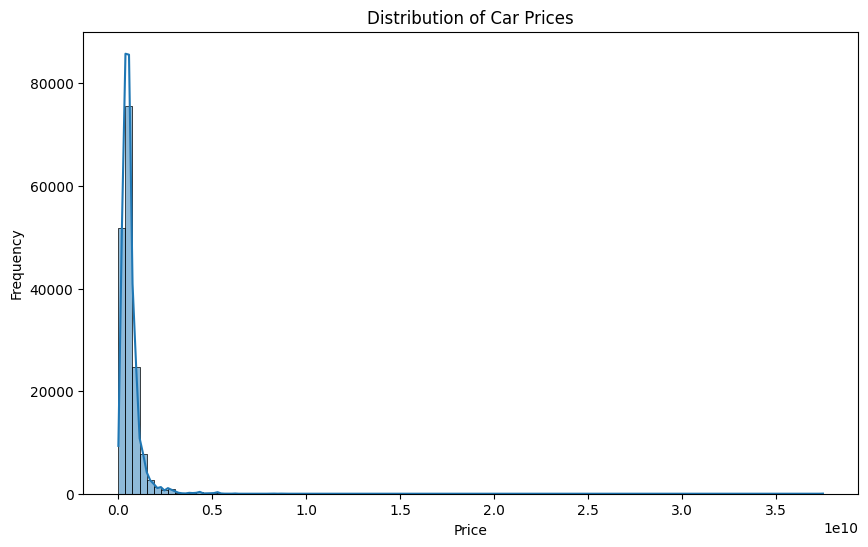

In [16]:
histplot(filtered_data_cleaned, 'price', 'Distribution of Car Prices', 'Price')

- The distribution of car prices is **heavily skewed to the left**, meaning:
  - Most cars are priced at the **lower end**.
  - A small number of high-priced cars create a **long tail** on the right.

- **Challenge**:
  - This skewness can make it harder for models to learn effectively, as the high-priced outliers may dominate the learning process.

- **Proposed Solution**:
  - Apply a **`log1p` transformation** to the car prices.
    - This compresses the range of higher prices while preserving the order of values.
    - The result is a more balanced and normalized distribution.

- The log-transformed prices will be used as the target variable for better predictive modeling.


#### Log1p Transformation

<ipython-input-17-27ea5ef8e8b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['log_price'] = np.log1p(filtered_data_cleaned['price'])  # Using log1p to handle zero values


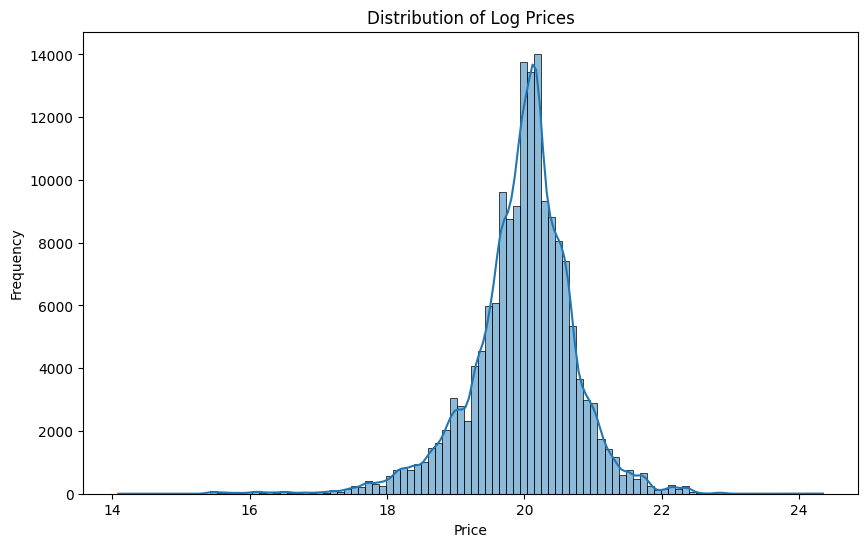

In [17]:
filtered_data_cleaned['log_price'] = np.log1p(filtered_data_cleaned['price'])  # Using log1p to handle zero values

histplot(filtered_data_cleaned, 'log_price', 'Distribution of Log Prices', 'Price')

- After applying the **log1p transformation** to the car prices:
  - The data now appears more **standardized** and **centered** around the middle.
  - The distribution is closer to a **normal distribution**, making it easier to model.

- **Key Benefits**:
  - Reduces the impact of **outliers**.
  - Improves the **interpretability** of the data.
  - Enhances the performance of machine learning algorithms that are sensitive to skewed data.

- This transformation ensures that the model can better learn and generalize relationships between features and the target variable.


### Price and Manufacture date

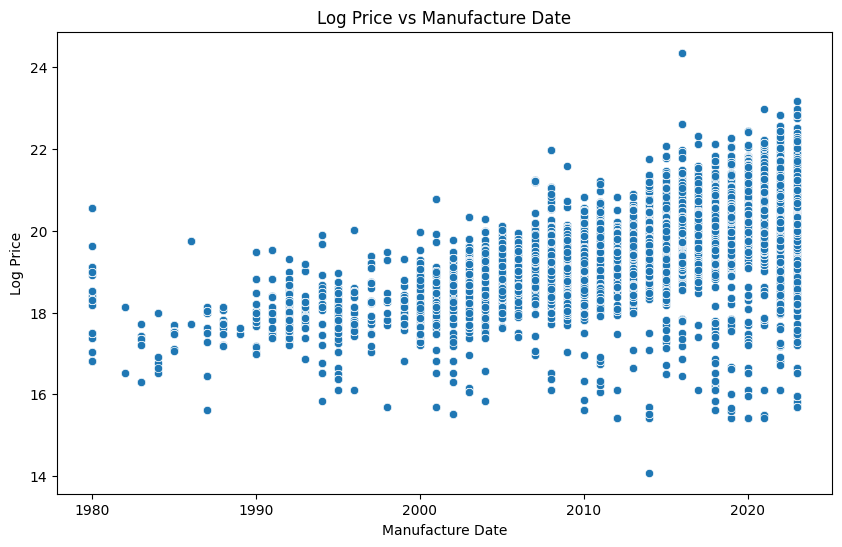

In [18]:
scatterplot(filtered_data_cleaned, 'manufacture_date', 'log_price', 'Log Price vs Manufacture Date', 'Manufacture Date', 'Log Price')

### Price and Brand

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


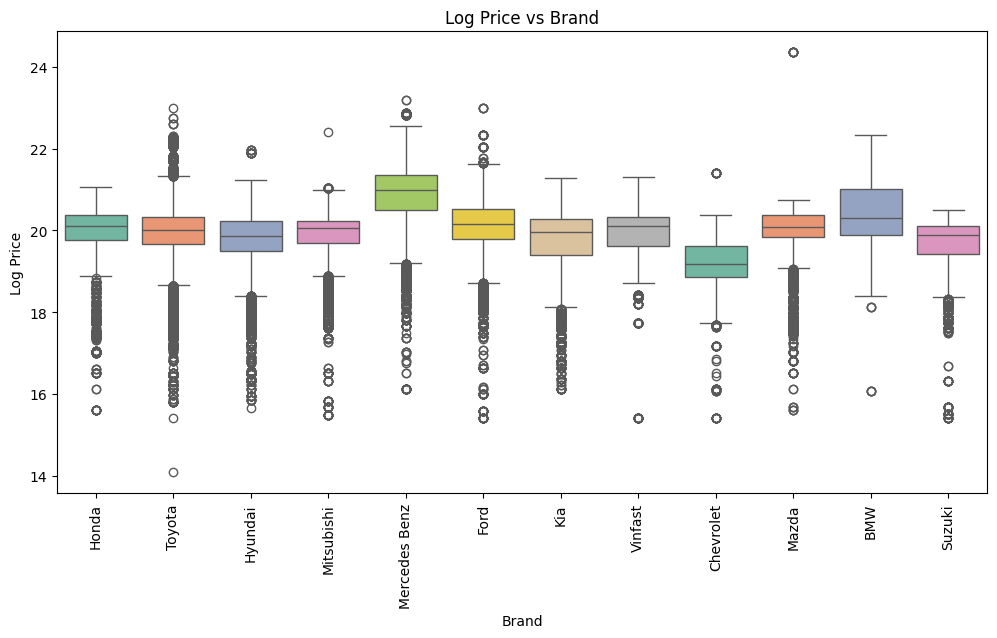

In [19]:
boxplot(filtered_data_cleaned, 'brand', 'log_price', 'Log Price vs Brand', 'Brand', 'Log Price')

### Price and Model

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


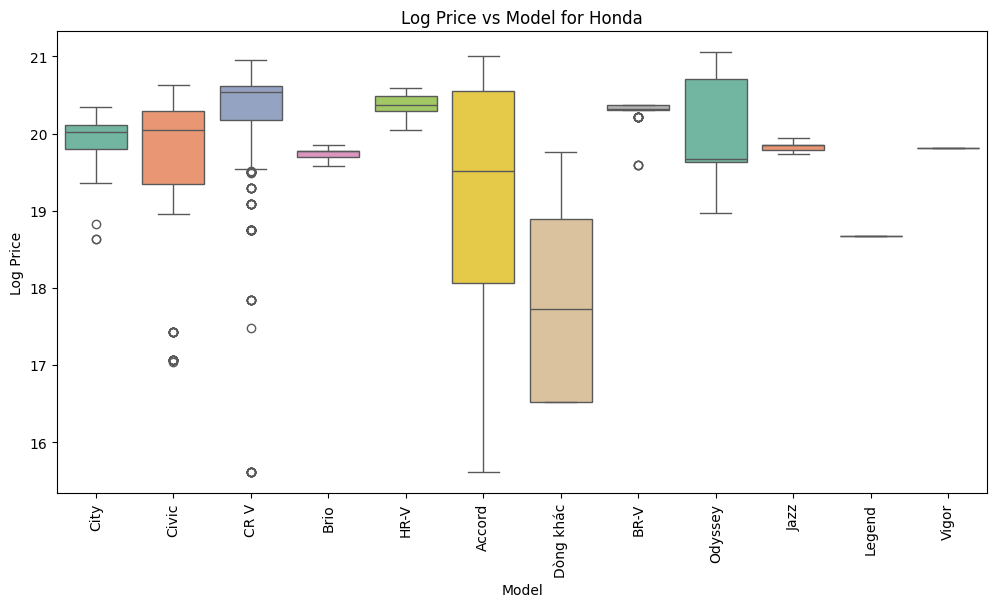

In [20]:
brand_a_data = filtered_data_cleaned[filtered_data_cleaned['brand'] == 'Honda']

boxplot(brand_a_data, 'model', 'log_price', 'Log Price vs Model for Honda', 'Model', 'Log Price')

### Price and Origin

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


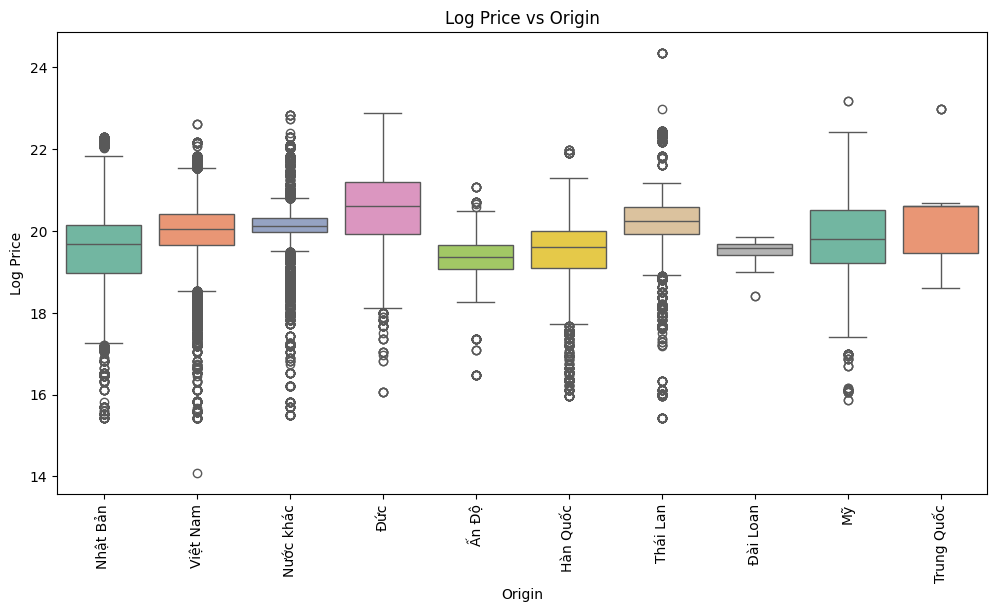

In [21]:
boxplot(filtered_data_cleaned, 'origin', 'log_price', 'Log Price vs Origin', 'Origin', 'Log Price')

### Price and Type

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


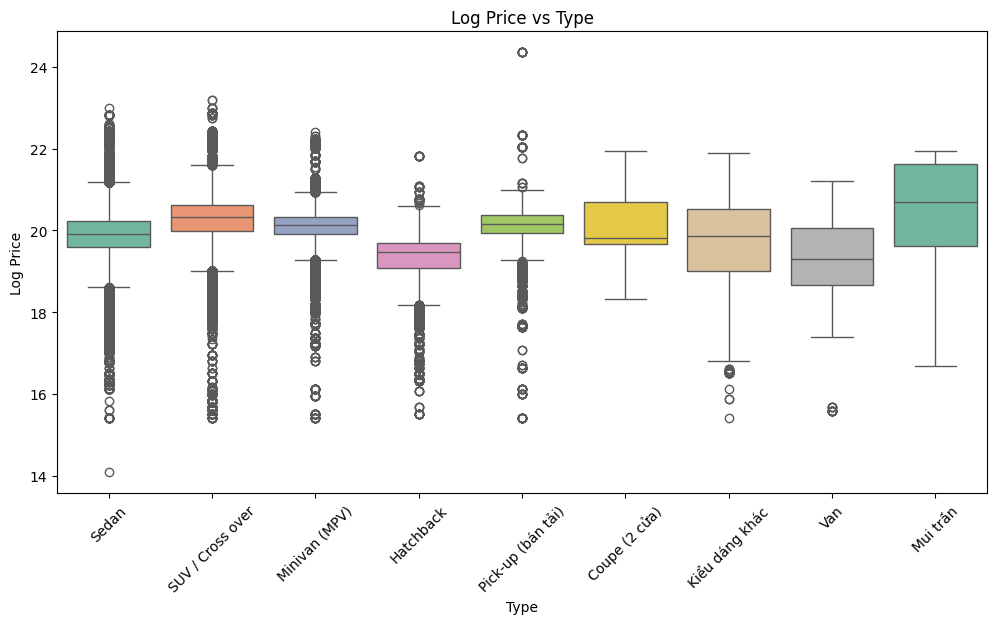

In [22]:
boxplot(filtered_data_cleaned, 'type', 'log_price', 'Log Price vs Type', 'Type', 'Log Price', rotation=45)

### Price and Seats

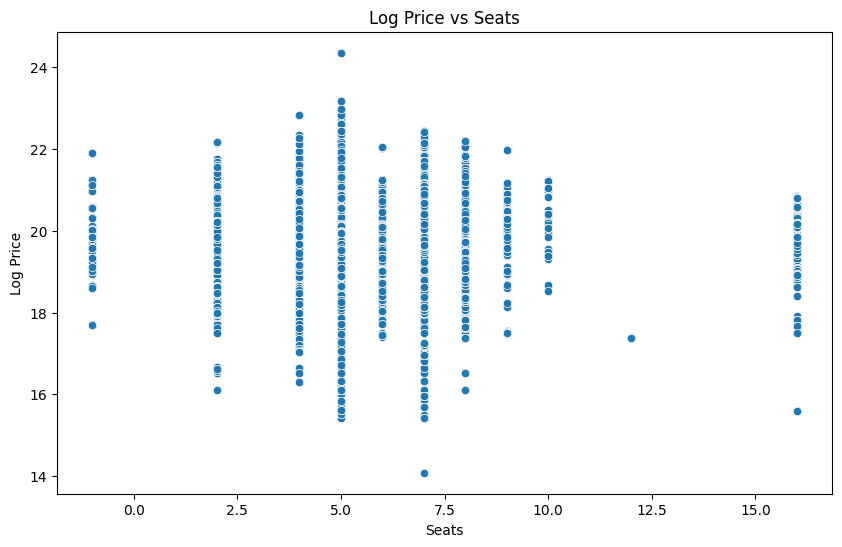

In [23]:
scatterplot(filtered_data_cleaned, 'seats', 'log_price', 'Log Price vs Seats', 'Seats', 'Log Price')

### Price and Gearbox

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


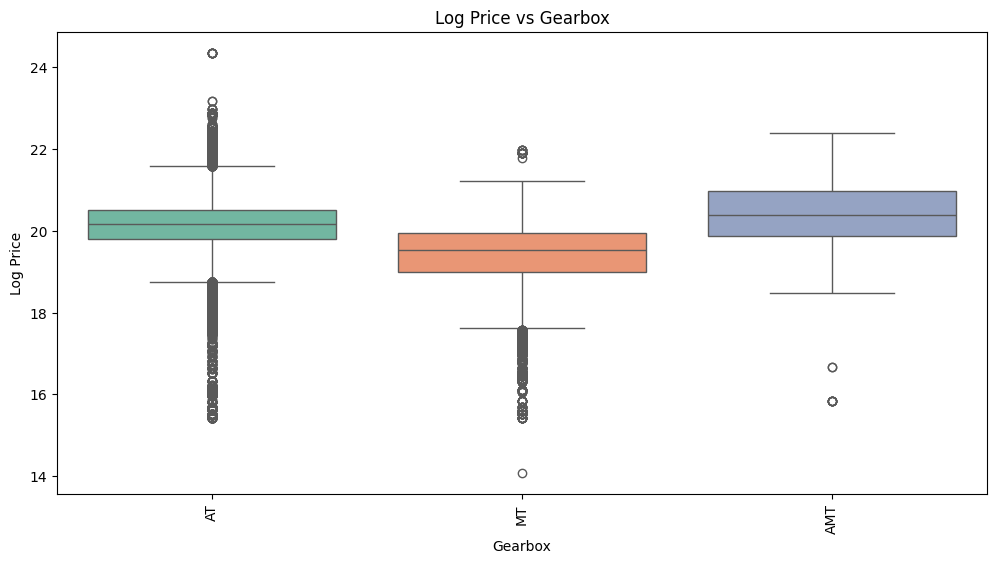

In [24]:
boxplot(filtered_data_cleaned, 'gearbox', 'log_price', 'Log Price vs Gearbox', 'Gearbox', 'Log Price')

### Price and Fuel Type

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


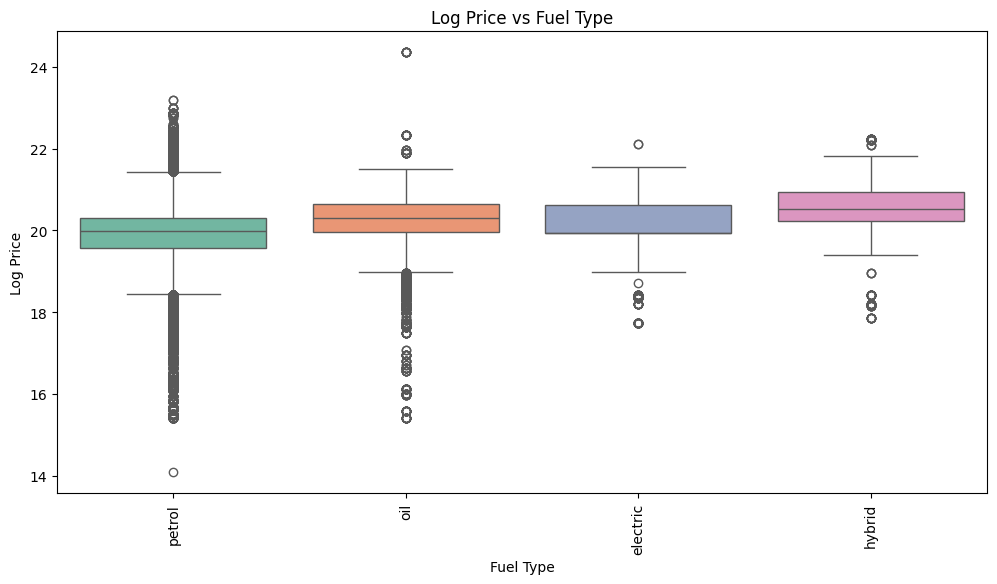

In [25]:
boxplot(filtered_data_cleaned, 'fuel', 'log_price', 'Log Price vs Fuel Type', 'Fuel Type', 'Log Price')

### Price and Color

<ipython-input-13-cc5c52a4af52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


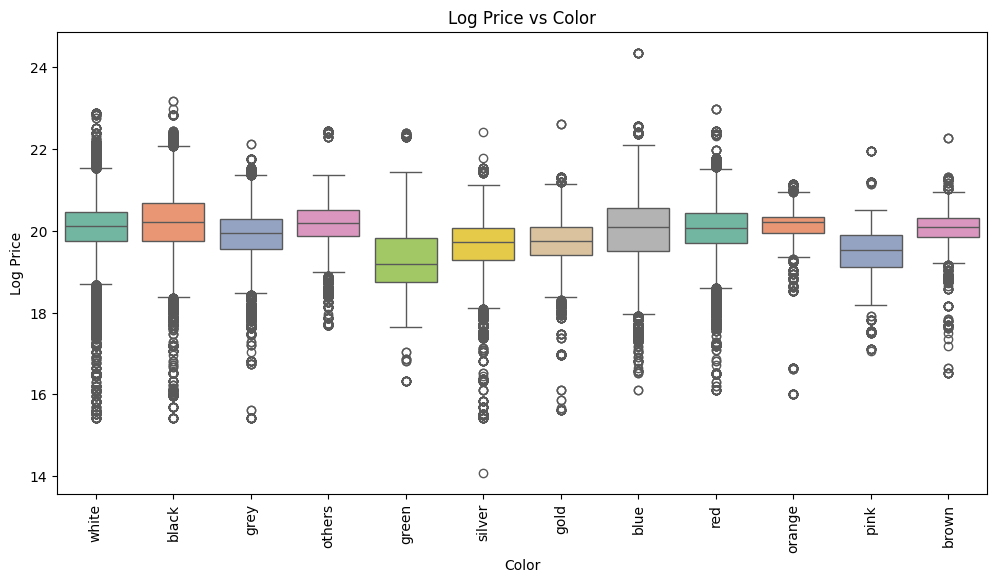

In [26]:
boxplot(filtered_data_cleaned, 'color', 'log_price', 'Log Price vs Color', 'Color', 'Log Price')

### Price and Mileage

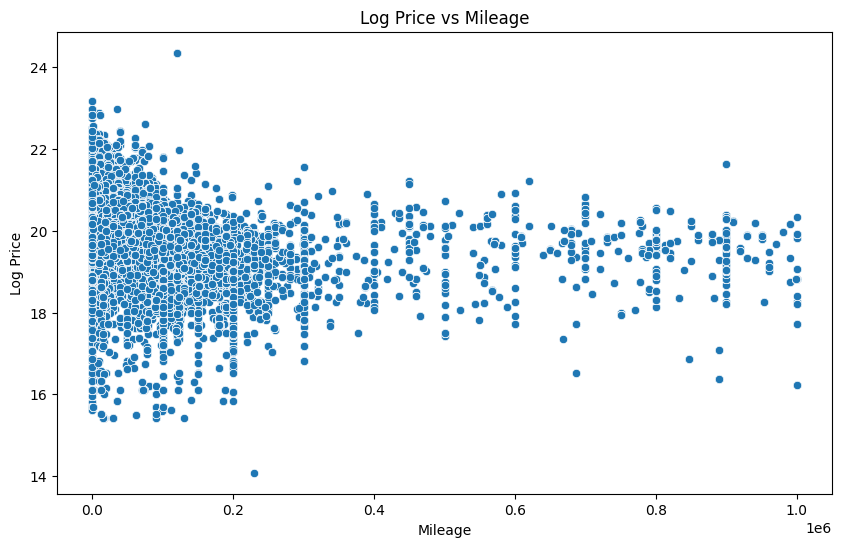

In [27]:
scatterplot(filtered_data_cleaned, 'mileage_v2', 'log_price', 'Log Price vs Mileage', 'Mileage', 'Log Price')

## Feature Engineering and Selection

### Transforming manufacture year to car age

- Transforming the manufacture year into car age:
  - Simplifies the relationship between the feature and the target (price).
  - Improves the model's ability to learn and predict by providing a more meaningful numerical feature.
  - Ensures time-independence, making the feature consistent regardless of the training or analysis year.


In [28]:
filtered_data_cleaned_copy = filtered_data_cleaned.copy()

In [29]:
current_year = 2024
filtered_data_cleaned_copy['car_age'] = current_year - filtered_data_cleaned_copy['manufacture_date']

In [30]:
filtered_data_cleaned_copy.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition,log_price,car_age
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used,19.935808,3
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used,19.723593,4
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used,19.935808,2
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used,19.999659,6
7,149562869,109545581,1693401905000,2020,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,MT,petrol,white,50000,465000000.0,used,19.957548,4


### Drop id, list_id, list_time columns

In [31]:
filtered_data_cleaned_copy = filtered_data_cleaned_copy.drop(
  columns=['id', 'list_id', 'list_time']
  )


### Train-test splitting

In [32]:
features = [
  'car_age',
  'brand',
  'model',
  'origin',
  'type',
  'seats',
  'gearbox',
  'fuel',
  'color',
  'mileage_v2',
  'condition'
  ]

X = filtered_data_cleaned_copy[features]
y = filtered_data_cleaned_copy[['log_price', 'price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train_log_price = y_train['log_price']
y_train_price = y_train['price']

y_test_log_price = y_test['log_price']
y_test_price = y_test['price']


### Normalize and encode the training data

In [33]:
categorical_features = ['brand', 'model', 'origin', 'type', 'gearbox', 'fuel', 'color', 'condition']
numerical_features = ['seats', 'mileage_v2', 'car_age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

X_train = preprocessor.fit_transform(X_train[features])
X_test = preprocessor.transform(X_test)

joblib.dump(preprocessor, './models/preprocessor.pkl')

one_hot_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_columns = numerical_features + list(one_hot_columns)

X_train = X_train.toarray()
X_train = pd.DataFrame(X_train, columns=all_columns)

X_test = X_test.toarray()
X_test = pd.DataFrame(X_test, columns=all_columns)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Training model

## XGBoost

In [34]:
from xgboost import XGBRegressor

In [35]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train_log_price)

y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb_price = np.expm1(y_pred_xgb)

joblib.dump(xgb_model, './models/xgb_model.pkl')

['./models/xgb_model.pkl']

## SVM

In [36]:
from sklearn.svm import SVR

In [37]:
# svr_model = SVR()
# svr_model.fit(X_train, y_train_log_price)

# y_pred_svr = svr_model.predict(X_test)

# y_pred_svr_price = np.expm1(y_pred_svr)

# Evaluate model

**Model Evaluation Metrics Discussion**

When evaluating a regression model, especially on a dataset with skewed distributions like car prices, it's essential to consider metrics that capture both **percentage-based errors** and **absolute errors**. This is because the data can be heavily skewed, where most of the cars have lower prices, but a few might be very expensive.

**Key Challenges:**

- **Percentage-based metrics (e.g., MAPE, SMAPE):**
   - These metrics express the error as a percentage, making it easier to interpret, especially for lower-priced cars. However, a small percentage error on high-priced cars can still translate to a significant monetary error, which could dominate the evaluation.
   
- **Absolute error metrics (e.g., MAE, MSE):**
   - These metrics measure the error in absolute terms, which is helpful to understand how much money you are off in predictions. However, when the data is skewed, the error from expensive cars can overwhelm the evaluation, making it look like the model is underperforming, even if the majority of the predictions are quite accurate.

**Balanced Metrics:**

Given the skewed nature of the data, we need a **balanced evaluation** that considers both the **relative** and **absolute** errors. Below are some metrics that can address these challenges:

- **Symmetric Mean Absolute Percentage Error (SMAPE):**
   - SMAPE is a good choice when dealing with percentage errors, as it adjusts for symmetry and avoids the issues of zero values in the denominator. It provides a percentage error that balances both small and large values effectively.

- **Mean Absolute Error (MAE):**
   - MAE provides a clear picture of how much money you are off on average. It tells us the **absolute error**, which is crucial for applications where monetary loss is a key concern.

- **Log-Cosh Loss:**
   - Log-Cosh Loss is less sensitive to outliers than MAE or MSE because it applies the logarithm to the squared error. This is helpful when dealing with expensive cars that could otherwise disproportionately affect the error.

- **Root Mean Squared Error (RMSE):**
   - RMSE penalizes larger errors more than MAE, making it a good metric to account for significant deviations, especially with high-value cars. However, it can be sensitive to outliers.

- **Geometric Mean Absolute Error (GMAE):**
   - GMAE combines absolute and relative error, making it an effective metric for datasets with skewed distributions. It emphasizes smaller errors but still penalizes large mistakes, especially with expensive cars.

- **R-Squared (on Log-Transformed Target):**
   - R-Squared shows how well the model explains the variance in the data. Applying it to a **log-transformed price** helps account for the skewed nature of the target variable and gives a better understanding of how well the model fits the data.

**Why Use a Combination of Metrics?**

- **SMAPE** is particularly useful for understanding the relative performance of the model, especially for lower-priced cars.
- **MAE** or **Log-Cosh Loss** are excellent choices for capturing the **absolute errors**, ensuring that large monetary losses from expensive cars are accounted for.
- **RMSE** adds value by penalizing large errors more heavily, which can be important when mistakes on expensive cars matter significantly.
- **R-Squared** on a **log-transformed target** helps capture how well the model fits the overall data, accounting for the skewness.

By using a combination of **percentage-based metrics** like **SMAPE** and **absolute error metrics** like **MAE** or **Log-Cosh Loss**, you ensure that both **small** and **large** errors are considered. This leads to a more **comprehensive and balanced evaluation** of the model's performance, especially when the data contains both low-priced and high-priced items.


## Metrics

In [38]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error, r2_score

### Percentage-based Metrics

#### Mean Absolute Percentage Error (MAPE)

In [39]:
mape = mean_absolute_percentage_error(y_test_price, y_pred_xgb_price)
print(f"MAPE (XGBoost): {100*mape:4f}%")

# mape = mean_absolute_percentage_error(y_test_price, y_pred_svr_price)
# print(f"MAPE (SVM): {100*mape:4f}%")

MAPE (XGBoost): 22.984040%


#### Symmetric Mean Absolute Percentage Error (SMAPE)

In [40]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_value = smape(y_test_price, y_pred_xgb_price)
print(f"SMAPE (XGBoost): {smape_value:.4f}%")

# smape_value = smape(y_test_price, y_pred_svr_price)
# print(f"SMAPE (SVM): {smape_value:.4f}%")

SMAPE (XGBoost): 12.7081%


### Error Metrics

#### Median Absolute Error (MedAE)

In [41]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y_test_price, y_pred_xgb_price)
print(f"Median Absolute Error (XGBoost): {medae:.4f}")

# medae = median_absolute_error(y_test_price, y_pred_svr_price)
# print(f"Median Absolute Error (SVM): {medae:.4f}")

Median Absolute Error (XGBoost): 33390944.0000


#### Geometric Mean Absolute Error (GMAE)

In [42]:
def gmae(y_true, y_pred):
    return np.exp(np.mean(np.log(np.abs(y_pred - y_true) + 1)))

gmae_value = gmae(y_test_price, y_pred_xgb_price)
print(f"Geometric Mean Absolute Error (XGBoost): {gmae_value:.4f}")

# gmae_value = gmae(y_test_price, y_pred_svr_price)
# print(f"Geometric Mean Absolute Error (SVM): {gmae_value:.4f}")

Geometric Mean Absolute Error (XGBoost): 31020201.7012


### Logarithmic Metrics

#### Mean Squared Logarithmic Error (MSLE)

In [43]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test_price, y_pred_xgb_price)
print(f"Mean Squared Logarithmic Error (XGBoost): {msle:.4f}")

# msle = mean_squared_log_error(y_test_price, y_pred_svr_price)
# print(f"Mean Squared Logarithmic Error (SVM): {msle:.4f}")

Mean Squared Logarithmic Error (XGBoost): 0.0804


## Visualize predict

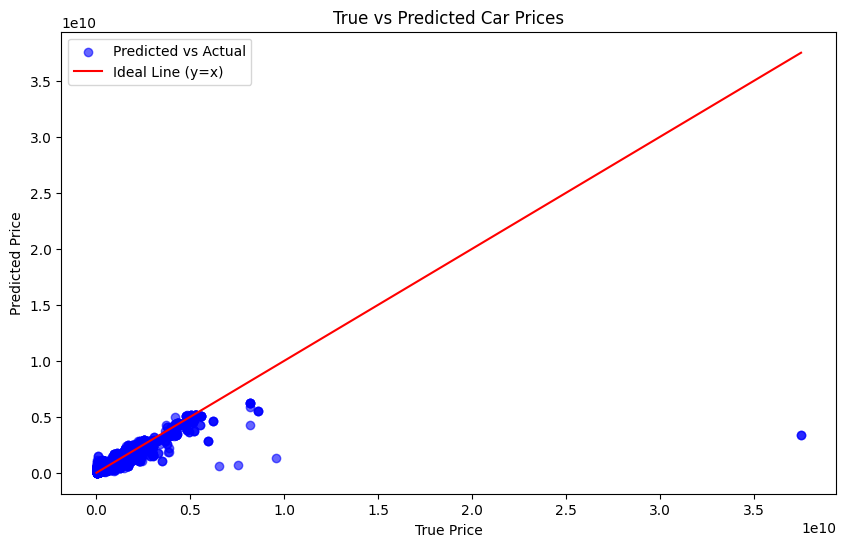

In [44]:
import matplotlib.pyplot as plt

# Assuming y_test_price and y_pred_price are your true and predicted values
plt.figure(figsize=(10, 6))

# Scatter Plot to visualize true vs predicted
plt.scatter(y_test_price, y_pred_xgb_price, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test_price), max(y_test_price)], [min(y_test_price), max(y_test_price)], color='red', label="Ideal Line (y=x)")
plt.title('True vs Predicted Car Prices')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


**Model Evaluation: True vs Predicted Car Prices**

The scatter plot shows a generally good alignment between the predicted and actual car prices, as most of the data points are clustered close to the red line (the ideal line where predicted equals actual). This indicates that the model is performing well overall, with predictions being accurate for the majority of the dataset.

However, there are a few cases where the actual price is much higher than the predicted price, which can be seen by some points being significantly above the red line. These outliers suggest that the model may have difficulties predicting the higher-end car prices accurately, possibly due to complexity or limitations in the model's ability to capture certain patterns in the data.

Further refinement of the model or consideration of additional features might help improve its predictions for these high-price cases.
